# ***DOWNLOADING COVID BEDS DATA***

In [18]:
import urllib.request as urllib2
import json

def urltojson(url):
  apis_page = urllib2.urlopen(url).read()
  apis_data = json.loads(apis_page)
  return apis_data

In [19]:
andhrapradesh_data = urltojson('https://covidaps.com/data/covidaps.com/bed_data.json')

In [20]:
bengaluru_data = urltojson('https://covidbengaluru.com/data/covidbengaluru.com/bed_data.json')

In [21]:
delhi_data = urltojson('https://coviddelhi.com/data/coviddelhi.com/bed_data.json')

In [22]:
mp_data = urltojson('https://covidmp.com/data/covidmp.com/bed_data.json') #MadhyaPradesh

In [23]:
tn_data = urltojson('https://covidtnadu.com/data/covidtnadu.com/bed_data.json') #TamilNadu

In [24]:
telangana_data = urltojson('https://covidtelangana.com/data/covidtelangana.com/bed_data.json')

In [25]:
wb_data = urltojson('https://covidwb.com/data/covidwb.com/bed_data.json') #WestBengal

In [26]:
pune_data = urltojson('https://covidpune.com/data/covidpune.com/bed_data.json')

In [55]:
import pandas as pd
delhi_df = pd.DataFrame(delhi_data) #dataframe for delhi
bengaluru_df = pd.DataFrame(bengaluru_data)


########### Combine the dataframes to get a complete dataframe

# ***Exploratory Data Analysis***

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/recent_beds_df') ####### Getting data from previously saved checkpoint

In [56]:
df.head() # dataframe for all the available areas

,Unnamed: 0,district,area,hospital_category,hospital_name,hospital_address,hospital_phone,last_updated_on,hospital_poc_name,hospital_poc_designation,...,total_icu_beds_with_ventilator,available_icu_beds_with_ventilator,__delete__,fee_regulated_beds,total_beds_allocated_to_covid,available_beds_allocated_to_covid,bed_breakup,Notes,last_updated_date,last_updated_time
0,0,Delhi,Delhi,Pvt,Aashlok Hospital,"25 A, Block AB, Community Centre, Safdarjung E...",1146165900,1645156080000,NaN,NaN,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Delhi,Delhi,Pvt,AASTHA HOSPITAL,"Badli Rd, Sector 19, Rohini, New Delhi, Delhi ...",9250913363,1645184760000,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Delhi,Delhi,Pvt,Ace Hospital,"238, Nasir Pur Road, Near JBM Public School, N...",9650991413,1645142520000,NaN,NaN,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Delhi,Delhi,Pvt,Adarsh Multispeciality Hospital & Trauma Centre,"A-12, Sarai pipal thola Extn. , Adarsh Nagar, ...","01127670255,8555551146",1645153980000,NaN,NaN,...,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Delhi,Delhi,Central Govt,AIIMS Jhajjar,"Tehsil Badli, Badsa, Haryana 124105, India",8929900156,1667787000000,NaN,NaN,...,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.columns

Index(['Unnamed: 0', 'district', 'area', 'hospital_category', 'hospital_name',
       'hospital_address', 'hospital_phone', 'last_updated_on',
       'hospital_poc_name', 'hospital_poc_designation', 'hospital_poc_phone',
       'officer_name', 'officer_designation', 'charges', 'pincode',
       'total_beds_without_oxygen', 'available_beds_without_oxygen',
       'total_beds_with_oxygen', 'available_beds_with_oxygen',
       'total_icu_beds_without_ventilator',
       'available_icu_beds_without_ventilator',
       'total_icu_beds_with_ventilator', 'available_icu_beds_with_ventilator',
       '__delete__', 'fee_regulated_beds', 'total_beds_allocated_to_covid',
       'available_beds_allocated_to_covid', 'bed_breakup', 'Notes',
       'last_updated_date', 'last_updated_time'],
      dtype='object')

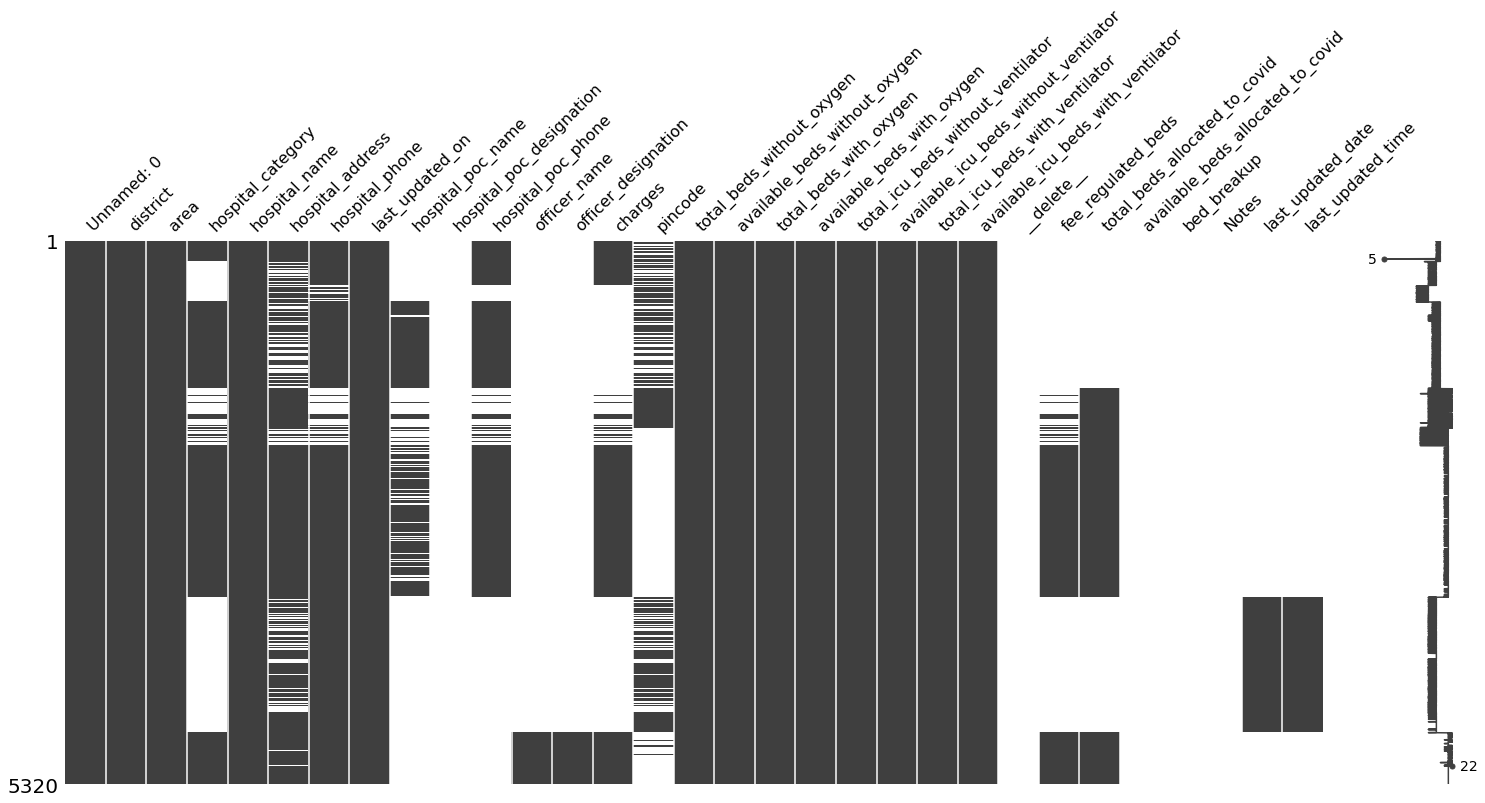

In [33]:
msno.matrix(df) # visualizing missing values

In [34]:
total_oxygen = df['available_beds_with_oxygen'].tolist()
total_icu = df['available_icu_beds_without_ventilator'].tolist()
total_ventillator = df['available_icu_beds_with_ventilator'].tolist()

In [35]:
def remove_nans(beds):
  cleaned_list = [x for x in beds if x == x]
  return cleaned_list

total_oxygen = sum(remove_nans(total_oxygen))
total_icu = sum(remove_nans(total_icu))
total_ventillator = sum(remove_nans(total_ventillator))

In [36]:
print(total_ventillator)
print(total_oxygen)
print(total_icu)

15925.0
147288.0
33867.0


In [37]:
arr = np.array([total_ventillator, total_icu, total_oxygen])

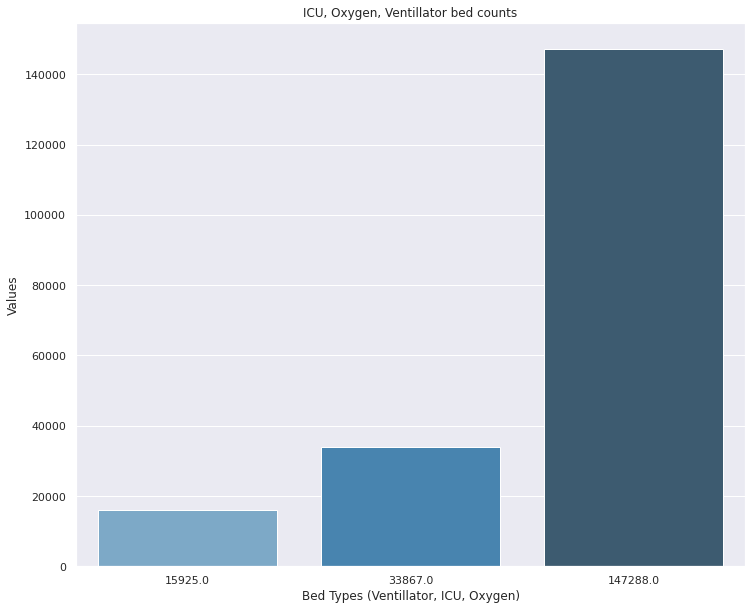

In [38]:
# visualizing bed counts for the entire dataframe
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=arr,y=[total_ventillator, total_icu, total_oxygen], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("ICU, Oxygen, Ventillator bed counts")
plt.show(sns)

In [39]:
areas = df['area'].tolist()
area_count_dict = {i:areas.count(i) for i in areas}

In [40]:
area_count_dict

{'Adilabad': 41,
 'Agar Malwa': 2,
 'Alirajpur': 5,
 'Anantapur': 22,
 'Anuppur': 2,
 'Ariyalur': 18,
 'Ashoknagar': 11,
 'Badradri': 15,
 'Balaghat': 21,
 'Barwani': 23,
 'Bengaluru': 158,
 'Betul': 17,
 'Bhind': 5,
 'Bhopal': 123,
 'Burhanpur': 6,
 'CS/Nagarpalika': 57,
 'Chengalpattu': 67,
 'Chengalpet': 1,
 'Chennai': 329,
 'Chhatarpur': 3,
 'Chhindwara': 23,
 'Chittoor': 32,
 'Coimbatore': 154,
 'Cuddalore': 37,
 'Damoh': 12,
 'Datia': 6,
 'Dehuroad Cantonment Board': 3,
 'Delhi': 204,
 'Dewas': 8,
 'Dhar': 15,
 'Dharmapuri': 13,
 'Dindigul': 60,
 'Dindori': 3,
 'East godavari': 14,
 'Erode': 60,
 'Guna': 7,
 'Guntur': 35,
 'Gwalior': 66,
 'Harda': 14,
 'Hoshangabad': 15,
 'Hyderabad': 131,
 'Indore': 68,
 'Jabalpur': 57,
 'Jagtial': 25,
 'Jangaon': 6,
 'Jayashankar': 8,
 'Jhabua': 8,
 'Jogulamba': 24,
 'Kallakurichi': 26,
 'Kamareddy': 55,
 'Kancheepuram': 41,
 'Kanniyakumari': 48,
 'Kanyakumari': 9,
 'Karimnagar': 68,
 'Karur': 38,
 'Katni': 8,
 'Khadki Cantonment Board': 1,
 'K

In [41]:
districts = df['district'].tolist()
districts_count_dict = {i:districts.count(i) for i in districts}

In [42]:
dis_counts = sorted(districts_count_dict.items(), key=lambda item: item[1], reverse=True)[:15]

In [43]:
dis_counts[0]

('Pune', 505)

In [44]:
districts = []
counts = []

for i in range(len(dis_counts)):
  districts.append(dis_counts[i][0])
  counts.append(dis_counts[i][1])

print(districts)
print(counts)

['Pune', 'Chennai', 'Delhi', 'Warangal Urban', 'Medchal', 'Bengaluru', 'Coimbatore', 'Rangareddy', 'Salem', 'Hyderabad', 'Madurai', 'Bhopal', 'Thiruchirappalli', 'Thanjavur', 'Indore']
[505, 335, 204, 184, 169, 158, 154, 141, 135, 131, 130, 123, 118, 72, 68]


Text(0.5, 1.0, 'Most Popular areas in the dataset')

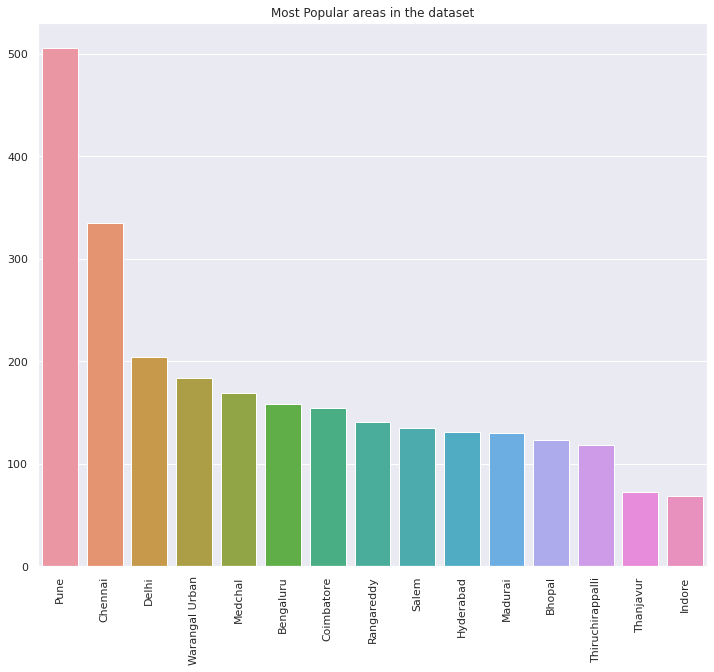

In [45]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=districts,y=counts)
plt.xticks(rotation=90)
plt.title("Most Popular areas in the dataset")


In [46]:
pune = df[df['district'] == "Pune"]
chennai = df[df['district'] == "Chennai"]
delhi = df[df['district'] == "Delhi"]
warangal = df[df['district'] == "Warangal Urban"]
medchal = df[df['district'] == "Medchal"]
bengaluru = df[df['district'] == "Bengaluru"]

In [47]:
def getPlotValues (df):
  total_oxygen = df['available_beds_with_oxygen'].tolist()
  total_icu = df['available_icu_beds_without_ventilator'].tolist()
  total_ventillator = df['available_icu_beds_with_ventilator'].tolist()

  total_oxygen = sum(remove_nans(total_oxygen))
  total_icu = sum(remove_nans(total_icu))
  total_ventillator = sum(remove_nans(total_ventillator))

  arr = np.array([total_ventillator, total_icu, total_oxygen])
  return arr

In [48]:
pune_arr = getPlotValues (pune)
chennai_arr = getPlotValues (chennai)
delhi_arr = getPlotValues (delhi)
warangal_arr = getPlotValues (warangal)
medchal_arr = getPlotValues (medchal)
bengaluru_arr = getPlotValues (bengaluru)

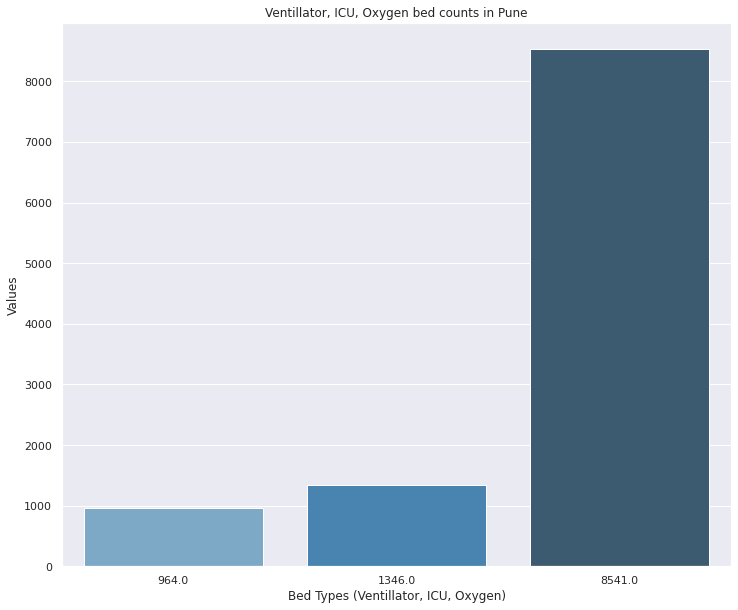

In [49]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=pune_arr,y=[pune_arr[0], pune_arr[1], pune_arr[2]], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("Ventillator, ICU, Oxygen bed counts in Pune")
plt.show(sns)

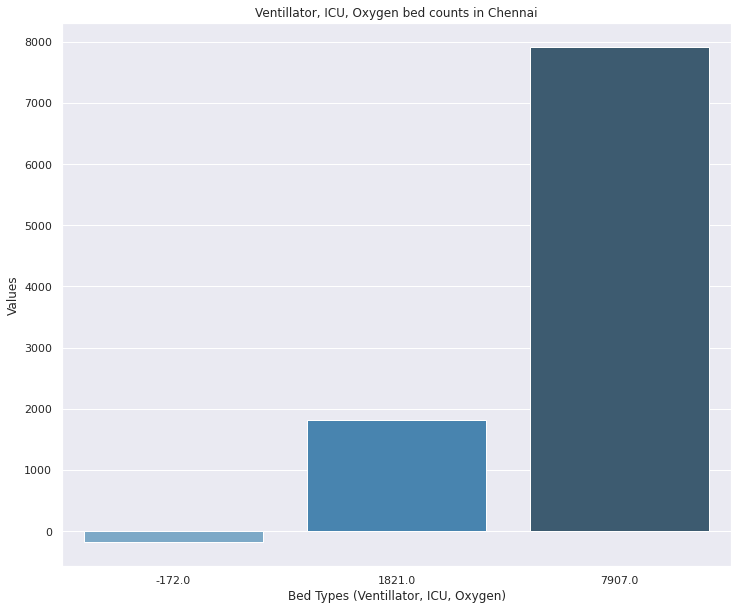

In [50]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=chennai_arr,y=[chennai_arr[0], chennai_arr[1], chennai_arr[2]], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("Ventillator, ICU, Oxygen bed counts in Chennai")
plt.show(sns)

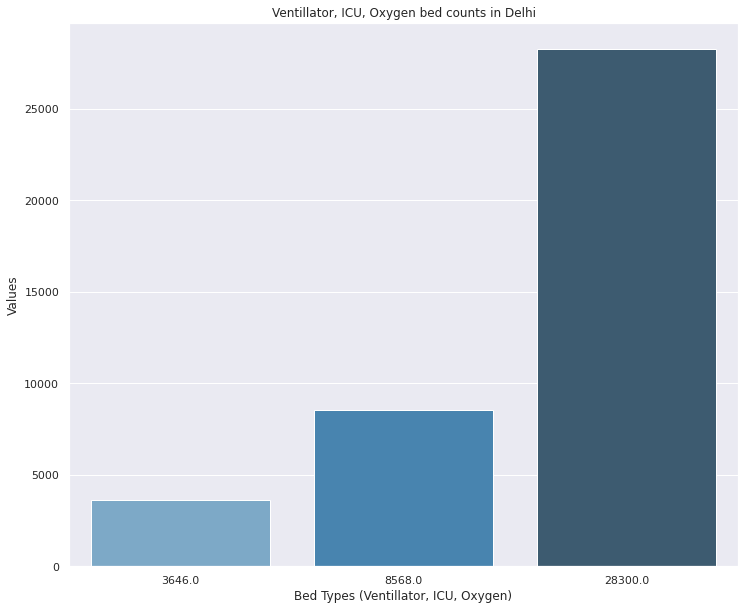

In [51]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=delhi_arr,y=[delhi_arr[0], delhi_arr[1], delhi_arr[2]], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("Ventillator, ICU, Oxygen bed counts in Delhi")
plt.show(sns)

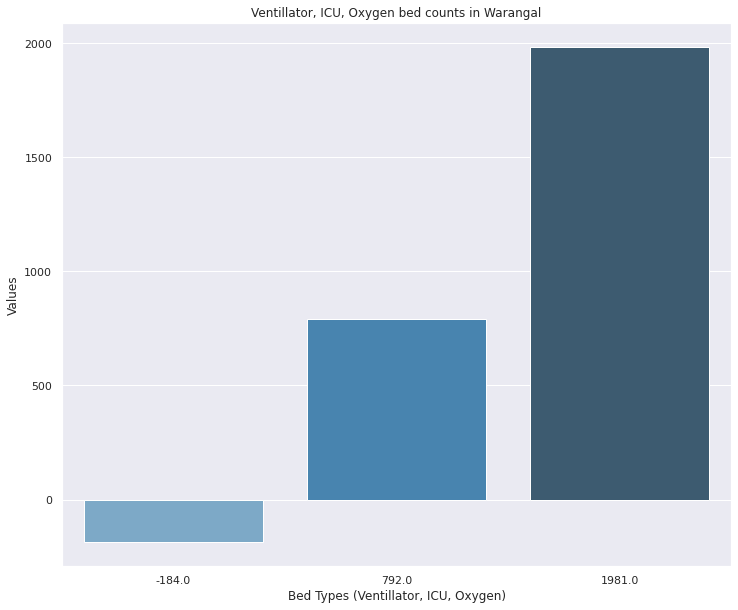

In [52]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=warangal_arr,y=[warangal_arr[0], warangal_arr[1], warangal_arr[2]], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("Ventillator, ICU, Oxygen bed counts in Warangal")
plt.show(sns)

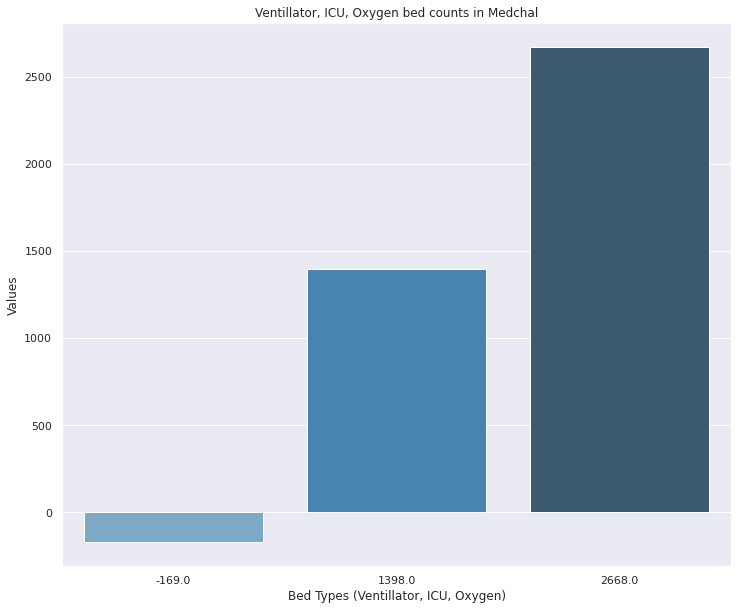

In [53]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=medchal_arr,y=[medchal_arr[0], medchal_arr[1], medchal_arr[2]], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("Ventillator, ICU, Oxygen bed counts in Medchal")
plt.show(sns)

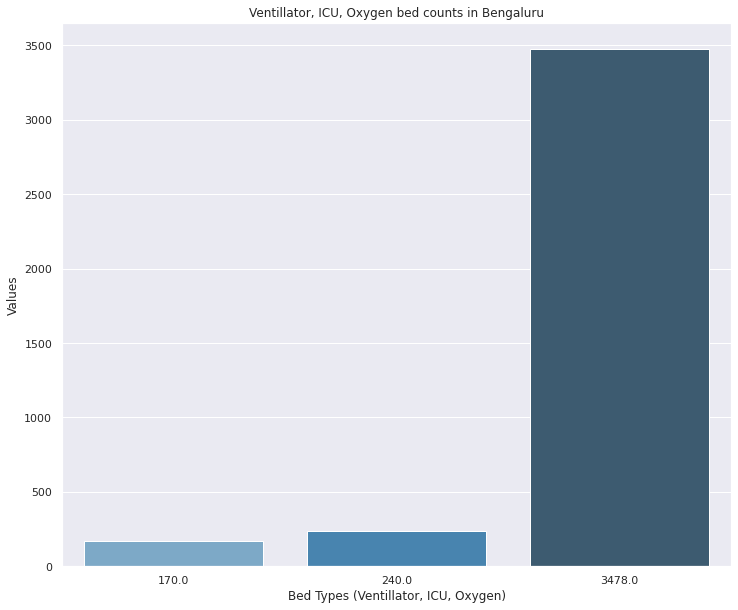

In [54]:
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x=bengaluru_arr,y=[bengaluru_arr[0], bengaluru_arr[1], bengaluru_arr[2]], palette="Blues_d")
plt.xlabel("Bed Types (Ventillator, ICU, Oxygen)")
plt.ylabel("Values")
plt.title("Ventillator, ICU, Oxygen bed counts in Bengaluru")
plt.show(sns)